In [40]:
import pandas as pd
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, PolynomialFeatures, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform, randint
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline as IMBPipeline
import tensorflow as tf
from tensorflow import keras

In [41]:
data = pd.read_csv(r"C:\Users\Ayesha\Downloads\EMProjectDataSetTake1.csv")

In [42]:
data.head()

,G,C,B,A,Va,Vb,Vc,Ia,Ib,Ic
0,0,0,0,0,437.858043,-519.295773,81.437730,0.588567,-1.594475,1.005908
1,0,0,0,0,448.516997,-512.553246,64.036249,0.635454,-1.601308,0.965854
2,0,0,0,0,458.762438,-505.339834,46.577395,0.681686,-1.606482,0.924797
3,0,0,0,0,468.536710,-497.605065,29.068355,0.727255,-1.610095,0.882840
4,0,0,0,0,477.855819,-489.387905,11.532086,0.772099,-1.612103,0.840004


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12023 entries, 0 to 12022
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       12023 non-null  int64  
 1   C       12023 non-null  int64  
 2   B       12023 non-null  int64  
 3   A       12023 non-null  int64  
 4   Va      12023 non-null  float64
 5   Vb      12023 non-null  float64
 6   Vc      12023 non-null  float64
 7   Ia      12023 non-null  float64
 8   Ib      12023 non-null  float64
 9   Ic      12023 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 939.4 KB


In [44]:
data.shape

(12023, 10)

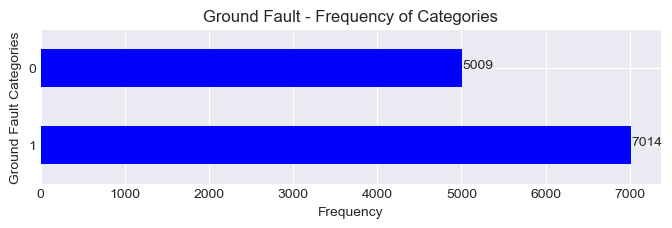

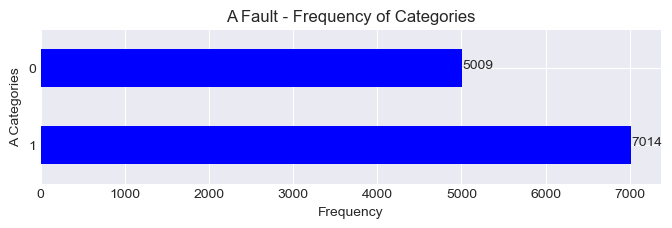

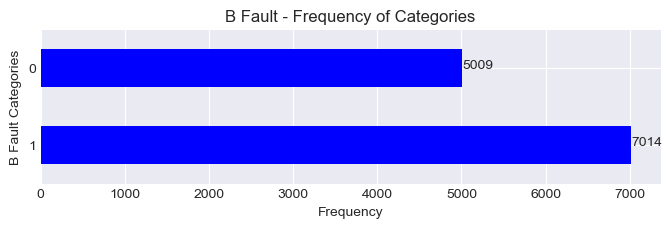

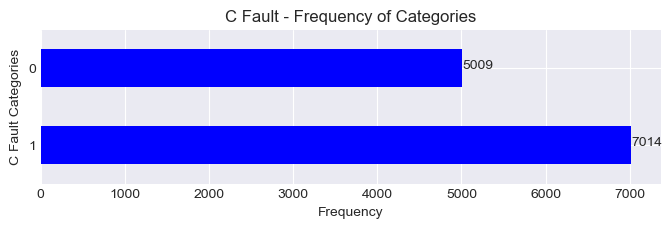

In [45]:
import matplotlib.pyplot as plt

# Calculate value counts for 'G' column
fault_counts = data['G'].value_counts()

# Create a horizontal bar plot
plt.figure(figsize=(8, 2))
fault_counts.plot(kind='barh', color='blue')
plt.xlabel('Frequency')
plt.ylabel('Ground Fault Categories')
plt.title('Ground Fault - Frequency of Categories')

# Display the frequency values on the bars
for index, value in enumerate(fault_counts):
    plt.text(value, index, str(value))

plt.show()

import matplotlib.pyplot as plt

# Calculate value counts for 'G' column
fault_counts = data['A'].value_counts()

# Create a horizontal bar plot
plt.figure(figsize=(8, 2))
fault_counts.plot(kind='barh', color='blue')
plt.xlabel('Frequency')
plt.ylabel('A Categories')
plt.title('A Fault - Frequency of Categories')

# Display the frequency values on the bars
for index, value in enumerate(fault_counts):
    plt.text(value, index, str(value))

plt.show()

import matplotlib.pyplot as plt

fault_counts = data['B'].value_counts()

# Create a horizontal bar plot
plt.figure(figsize=(8, 2))
fault_counts.plot(kind='barh', color='blue')
plt.xlabel('Frequency')
plt.ylabel('B Fault Categories')
plt.title('B Fault - Frequency of Categories')

# Display the frequency values on the bars
for index, value in enumerate(fault_counts):
    plt.text(value, index, str(value))

plt.show()

import matplotlib.pyplot as plt


fault_counts = data['C'].value_counts()

# Create a horizontal bar plot
plt.figure(figsize=(8, 2))
fault_counts.plot(kind='barh', color='blue')
plt.xlabel('Frequency')
plt.ylabel('C Fault Categories')
plt.title('C Fault - Frequency of Categories')

# Display the frequency values on the bars
for index, value in enumerate(fault_counts):
    plt.text(value, index, str(value))

plt.show()


In [46]:
# Representing faults in one Fault_Type Column
data['Fault_Type'] = data['G'].astype('str') + data['C'].astype('str') + data['B'].astype('str') + data['A'].astype('str')

In [47]:
data #now new column has been added to differntial different faults in form of 1000,0000,0001 etc

,G,C,B,A,Va,Vb,Vc,Ia,Ib,Ic,Fault_Type
0,0,0,0,0,437.858043,-519.295773,81.437730,0.588567,-1.594475,1.005908,0000
1,0,0,0,0,448.516997,-512.553246,64.036249,0.635454,-1.601308,0.965854,0000
2,0,0,0,0,458.762438,-505.339834,46.577395,0.681686,-1.606482,0.924797,0000
3,0,0,0,0,468.536710,-497.605065,29.068355,0.727255,-1.610095,0.882840,0000
4,0,0,0,0,477.855819,-489.387905,11.532086,0.772099,-1.612103,0.840004,0000
...,...,...,...,...,...,...,...,...,...,...,...
12018,1,1,1,1,-0.016302,-0.012327,0.028629,-7.506315,0.665021,6.841294,1111
12019,1,1,1,1,-0.015303,-0.013418,0.028722,-7.355479,0.316699,7.038780,1111
12020,1,1,1,1,-0.014284,-0.014493,0.028777,-7.194859,-0.032198,7.227057,1111
12021,1,1,1,1,-0.013246,-0.015549,0.028794,-7.024633,-0.381283,7.405916,1111


In [48]:
import pandas as pd
data['Fault_Type'] = data['Fault_Type'].replace({
    '0000': 'NO Fault',
    '0001': 'Line A Fault (not probable)',
    '0010': 'Line B Fault',
    '0100': 'Line C Fault',
    '1000': 'Ground Fault',
    '0011': 'Line A to Line B Fault',
    '0101': 'Line C to Line A Fault',
    '1001': 'Line A to Ground Fault',
    '1010': 'Line B to Ground Fault',
    '1100': 'Line C to Ground Fault',
    '0110': 'Line B to Line C Fault',
    '1011': 'Line A Line B to Ground Fault',
    '1101': 'Line A Line C to Ground Fault',
    '1110': 'Line B Line C to Ground Fault',
    '0111': 'Line A Line B Line C Fault',
    '1111': 'Line A Line B Line C to Ground Fault'
})


In [50]:
data

,G,C,B,A,Va,Vb,Vc,Ia,Ib,Ic,Fault_Type
0,0,0,0,0,437.858043,-519.295773,81.437730,0.588567,-1.594475,1.005908,NO Fault
1,0,0,0,0,448.516997,-512.553246,64.036249,0.635454,-1.601308,0.965854,NO Fault
2,0,0,0,0,458.762438,-505.339834,46.577395,0.681686,-1.606482,0.924797,NO Fault
3,0,0,0,0,468.536710,-497.605065,29.068355,0.727255,-1.610095,0.882840,NO Fault
4,0,0,0,0,477.855819,-489.387905,11.532086,0.772099,-1.612103,0.840004,NO Fault
...,...,...,...,...,...,...,...,...,...,...,...
12018,1,1,1,1,-0.016302,-0.012327,0.028629,-7.506315,0.665021,6.841294,Line A Line B Line C to Ground Fault
12019,1,1,1,1,-0.015303,-0.013418,0.028722,-7.355479,0.316699,7.038780,Line A Line B Line C to Ground Fault
12020,1,1,1,1,-0.014284,-0.014493,0.028777,-7.194859,-0.032198,7.227057,Line A Line B Line C to Ground Fault
12021,1,1,1,1,-0.013246,-0.015549,0.028794,-7.024633,-0.381283,7.405916,Line A Line B Line C to Ground Fault


In [51]:
data.dtypes

G               int64
C               int64
B               int64
A               int64
Va            float64
Vb            float64
Vc            float64
Ia            float64
Ib            float64
Ic            float64
Fault_Type     object
dtype: object

In [52]:
data

,G,C,B,A,Va,Vb,Vc,Ia,Ib,Ic,Fault_Type
0,0,0,0,0,437.858043,-519.295773,81.437730,0.588567,-1.594475,1.005908,NO Fault
1,0,0,0,0,448.516997,-512.553246,64.036249,0.635454,-1.601308,0.965854,NO Fault
2,0,0,0,0,458.762438,-505.339834,46.577395,0.681686,-1.606482,0.924797,NO Fault
3,0,0,0,0,468.536710,-497.605065,29.068355,0.727255,-1.610095,0.882840,NO Fault
4,0,0,0,0,477.855819,-489.387905,11.532086,0.772099,-1.612103,0.840004,NO Fault
...,...,...,...,...,...,...,...,...,...,...,...
12018,1,1,1,1,-0.016302,-0.012327,0.028629,-7.506315,0.665021,6.841294,Line A Line B Line C to Ground Fault
12019,1,1,1,1,-0.015303,-0.013418,0.028722,-7.355479,0.316699,7.038780,Line A Line B Line C to Ground Fault
12020,1,1,1,1,-0.014284,-0.014493,0.028777,-7.194859,-0.032198,7.227057,Line A Line B Line C to Ground Fault
12021,1,1,1,1,-0.013246,-0.015549,0.028794,-7.024633,-0.381283,7.405916,Line A Line B Line C to Ground Fault


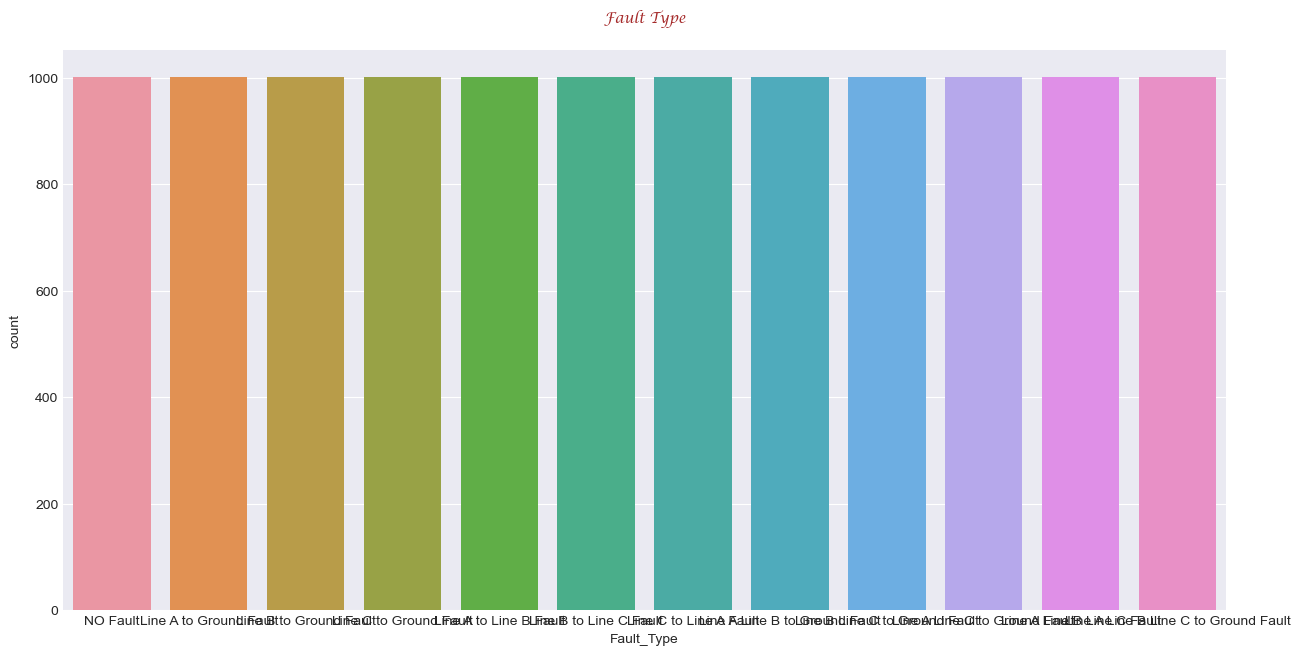

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data['Fault_Type'] = data['Fault_Type'].replace({
    '0000': 'NO Fault',
    '0011': 'Line A to Line B Fault',
    '0101': 'Line C to Line A Fault',
    '1001': 'Line A to Ground Fault',
    '1010': 'Line B to Ground Fault',
    '1100': 'Line C to Ground Fault',
    '0110': 'Line B to Line C Fault',
    '1011': 'Line A Line B to Ground Fault',
    '1101': 'Line A Line C to Ground Fault',
    '1110': 'Line B Line C to Ground Fault',
    '0111': 'Line A Line B Line C Fault',
    '1111': 'Line A Line B Line C to Ground Fault'
})

# Creating the countplot
plt.figure(figsize=(15, 16))
plt.subplot(2, 1, 1)
sns.countplot(x='Fault_Type', data=data)
plt.title("Fault Type", fontsize=20, color='Brown', font='Lucida Calligraphy', pad=20)

plt.show()


In [54]:
data['Fault_Type'].value_counts(ascending=False)

Line A to Ground Fault                  1002
Line B to Ground Fault                  1002
Line C to Ground Fault                  1002
Line A to Line B Fault                  1002
Line B to Line C Fault                  1002
Line C to Line A Fault                  1002
Line A Line B to Ground Fault           1002
Line B Line C to Ground Fault           1002
Line A Line C to Ground Fault           1002
Line A Line B Line C Fault              1002
Line A Line B Line C to Ground Fault    1002
NO Fault                                1001
Name: Fault_Type, dtype: int64

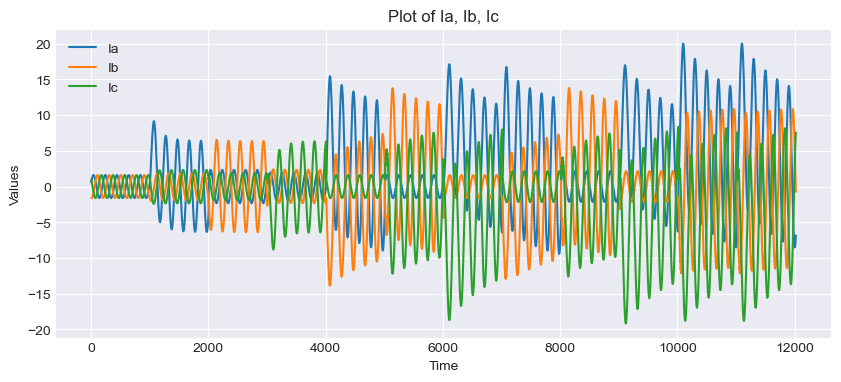

In [55]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 4))

# Plotting three columns 'Ia', 'Ib', 'Ic'
plt.plot(data["Ia"], label='Ia')
plt.plot(data["Ib"], label='Ib')
plt.plot(data["Ic"], label='Ic')

# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Plot of Ia, Ib, Ic')
plt.legend()

# Display the plot
plt.show()


C:\Users\Ayesha\AppData\Local\Temp\ipykernel_9088\2363660815.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Choosing a predefined style for a better look


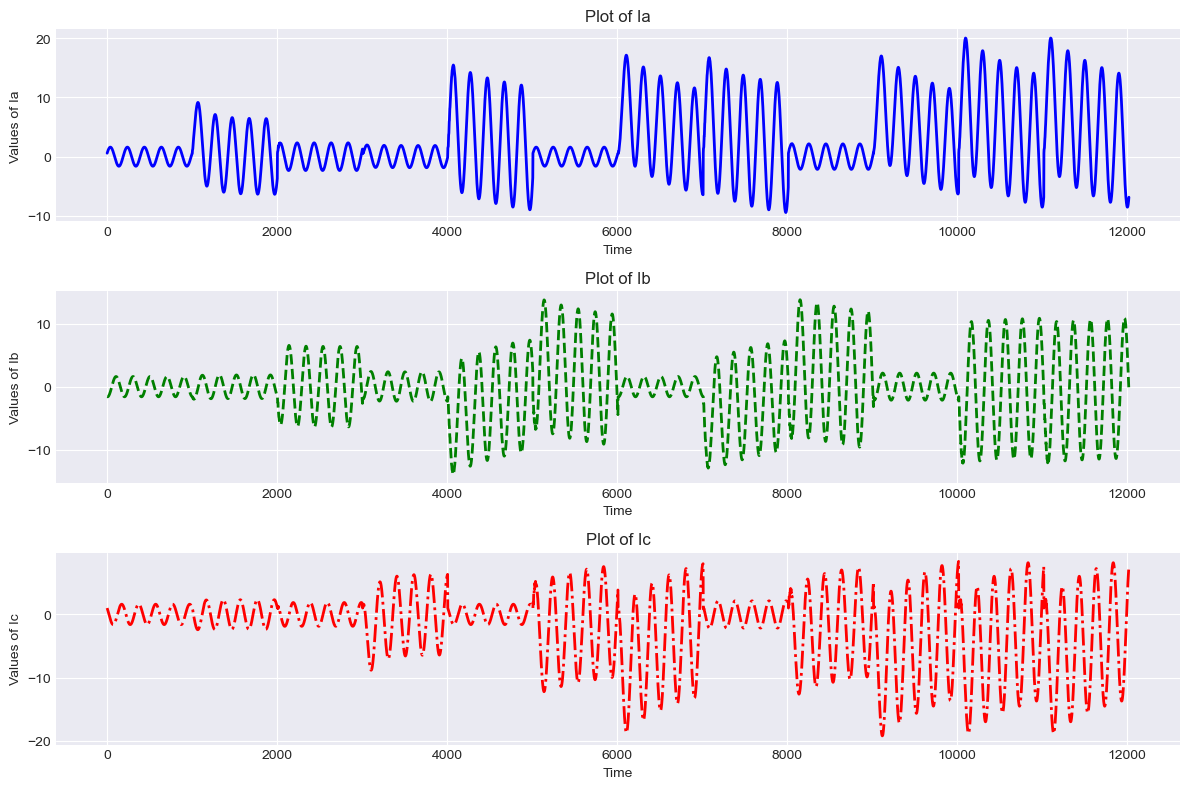

In [56]:
import matplotlib.pyplot as plt

# Set the figure size and style for better aesthetics
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-darkgrid')  # Choosing a predefined style for a better look

# Plotting each column in a separate subplot without markers
plt.subplot(3, 1, 1)
plt.plot(data["Ia"], linestyle='-', linewidth=2, color='blue')
plt.xlabel('Time')
plt.ylabel('Values of Ia')
plt.title('Plot of Ia')

plt.subplot(3, 1, 2)
plt.plot(data["Ib"], linestyle='--', linewidth=2, color='green')
plt.xlabel('Time')
plt.ylabel('Values of Ib')
plt.title('Plot of Ib')

plt.subplot(3, 1, 3)
plt.plot(data["Ic"], linestyle='-.', linewidth=2, color='red')
plt.xlabel('Time')
plt.ylabel('Values of Ic')
plt.title('Plot of Ic')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


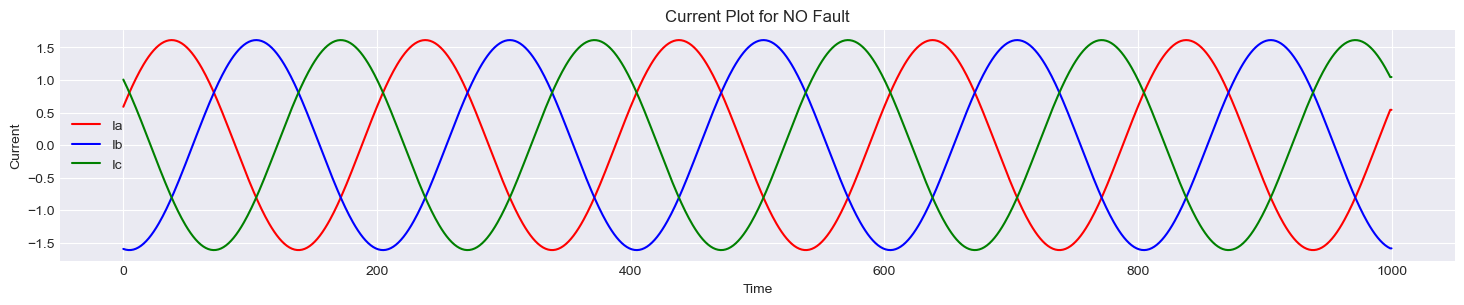

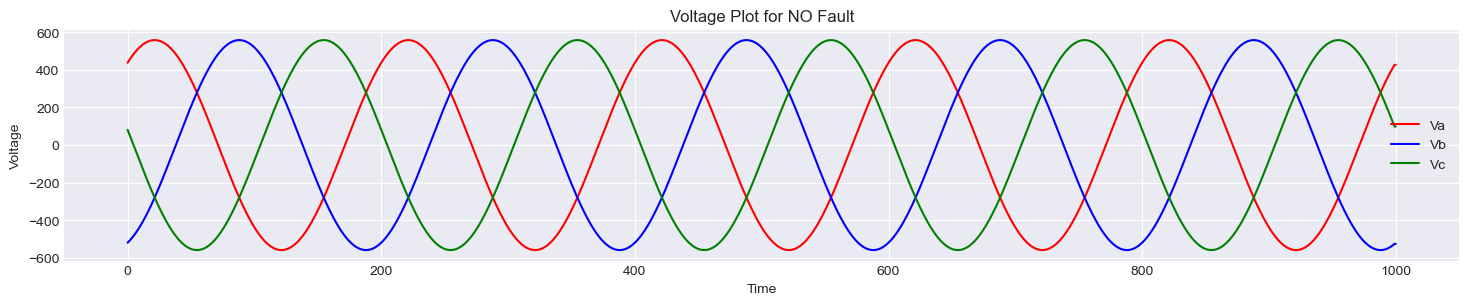

In [57]:
import matplotlib.pyplot as plt

# Filter data for 'NO Fault'
No_Fault = data[data['Fault_Type'] == 'NO Fault']

# Set the figure size and plot the current for 'NO Fault'
plt.figure(figsize=(18, 3))
plt.plot(No_Fault["Ia"], 'r', label='Ia')
plt.plot(No_Fault["Ib"], 'b', label='Ib')
plt.plot(No_Fault["Ic"], 'g', label='Ic')
plt.xlabel('Time')
plt.ylabel('Current')
plt.title('Current Plot for NO Fault')
plt.legend()  # Show legend for different currents

# Display the plot
plt.show()
import matplotlib.pyplot as plt

# Filter data for 'NO Fault'
No_Fault = data[data['Fault_Type'] == 'NO Fault']

# Set the figure size and plot the voltage for 'NO Fault'
plt.figure(figsize=(18, 3))
plt.plot(No_Fault["Va"], 'r', label='Va')
plt.plot(No_Fault["Vb"], 'b', label='Vb')
plt.plot(No_Fault["Vc"], 'g', label='Vc')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Voltage Plot for NO Fault')
plt.legend()  # Show legend for different voltages

# Display the plot
plt.show()


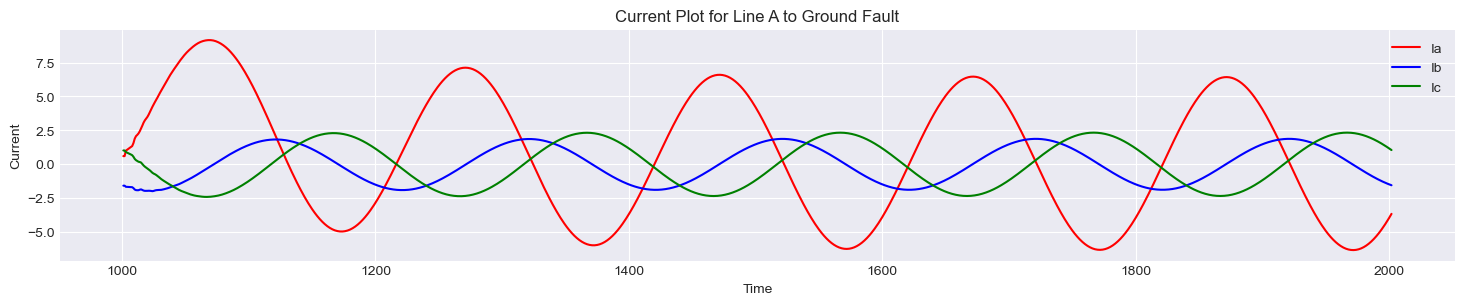

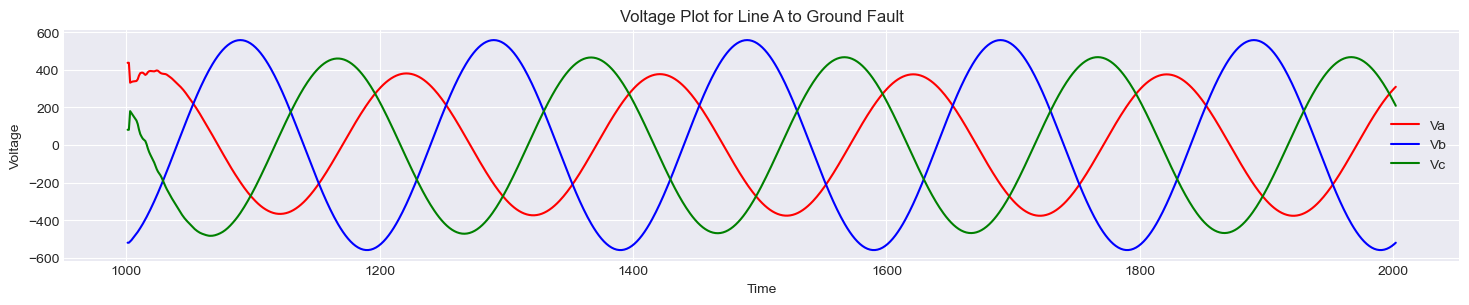

In [58]:
import matplotlib.pyplot as plt

# Filter data for 'Line A to Ground Fault'
LineA_to_Ground_Fault = data[data['Fault_Type'] == 'Line A to Ground Fault']

# Plot current for 'Line A to Ground Fault'
plt.figure(figsize=(18, 3))
plt.plot(LineA_to_Ground_Fault["Ia"], 'r', label='Ia')
plt.plot(LineA_to_Ground_Fault["Ib"], 'b', label='Ib')
plt.plot(LineA_to_Ground_Fault["Ic"], 'g', label='Ic')
plt.xlabel('Time')
plt.ylabel('Current')
plt.title('Current Plot for Line A to Ground Fault')
plt.legend()  # Show legend for different currents
plt.show()

# Plot voltage for 'Line A to Ground Fault'
plt.figure(figsize=(18, 3))
plt.plot(LineA_to_Ground_Fault["Va"], 'r', label='Va')
plt.plot(LineA_to_Ground_Fault["Vb"], 'b', label='Vb')
plt.plot(LineA_to_Ground_Fault["Vc"], 'g', label='Vc')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Voltage Plot for Line A to Ground Fault')
plt.legend()  # Show legend for different voltages
plt.show()


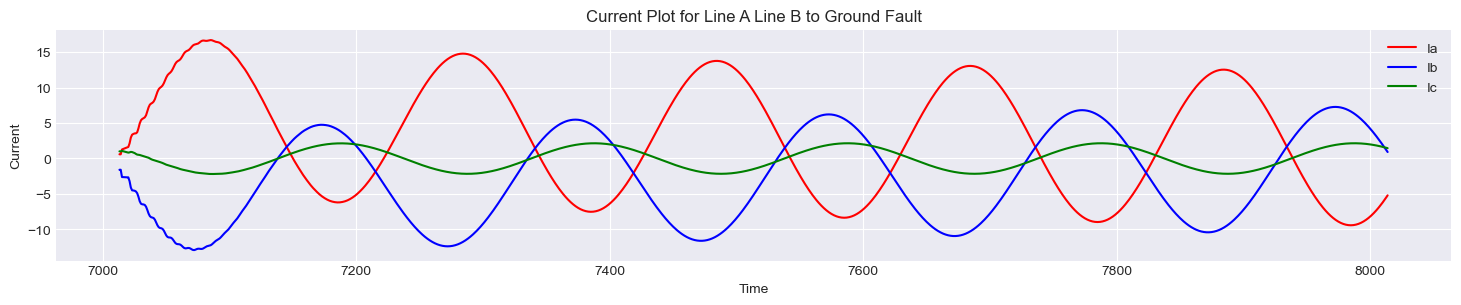

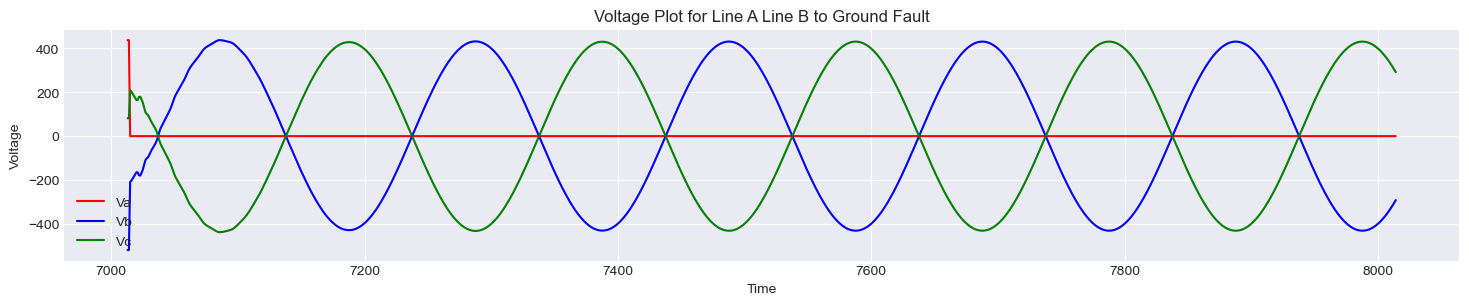

In [59]:
import matplotlib.pyplot as plt

# Filter data for 'Line A Line B to Ground Fault'
LineA_LineB_to_Ground_Fault = data[data['Fault_Type'] == 'Line A Line B to Ground Fault']

# Plot current for 'Line A Line B to Ground Fault'
plt.figure(figsize=(18, 3))
plt.plot(LineA_LineB_to_Ground_Fault["Ia"], 'r', label='Ia')
plt.plot(LineA_LineB_to_Ground_Fault["Ib"], 'b', label='Ib')
plt.plot(LineA_LineB_to_Ground_Fault["Ic"], 'g', label='Ic')
plt.xlabel('Time')
plt.ylabel('Current')
plt.title('Current Plot for Line A Line B to Ground Fault')
plt.legend()  # Show legend for different currents
plt.show()

# Plot voltage for 'Line A Line B to Ground Fault'
plt.figure(figsize=(18, 3))
plt.plot(LineA_LineB_to_Ground_Fault["Va"], 'r', label='Va')
plt.plot(LineA_LineB_to_Ground_Fault["Vb"], 'b', label='Vb')
plt.plot(LineA_LineB_to_Ground_Fault["Vc"], 'g', label='Vc')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Voltage Plot for Line A Line B to Ground Fault')
plt.legend()  # Show legend for different voltages
plt.show()


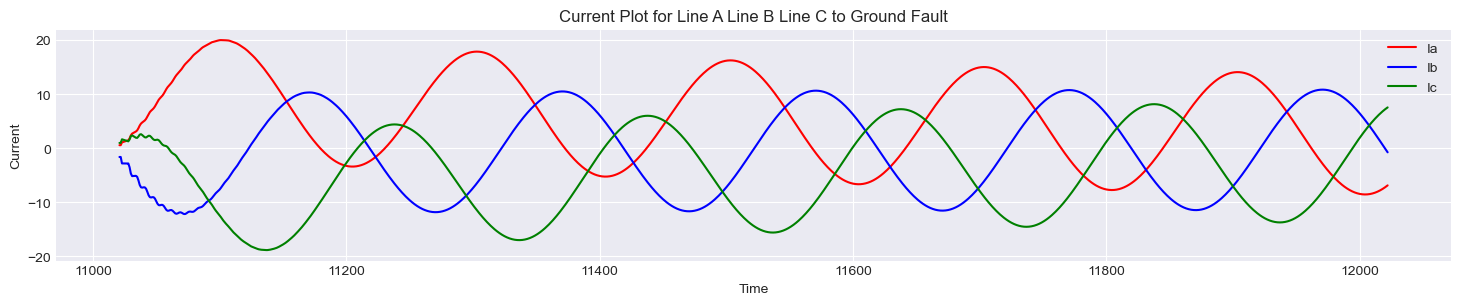

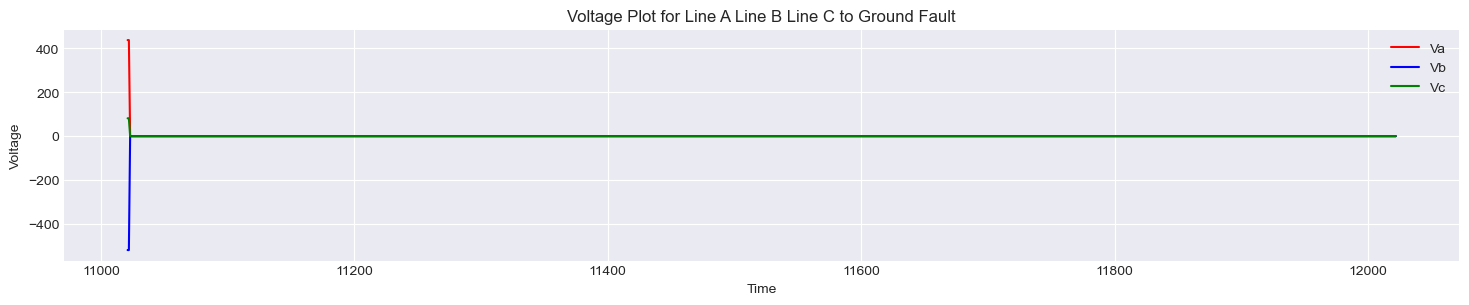

In [60]:
import matplotlib.pyplot as plt

# Filter data for 'Line A Line B Line C to Ground Fault'
LineABC_to_Ground_Fault = data[data['Fault_Type'] == 'Line A Line B Line C to Ground Fault']

# Plot current for 'Line A Line B Line C to Ground Fault'
plt.figure(figsize=(18, 3))
plt.plot(LineABC_to_Ground_Fault["Ia"], 'r', label='Ia')
plt.plot(LineABC_to_Ground_Fault["Ib"], 'b', label='Ib')
plt.plot(LineABC_to_Ground_Fault["Ic"], 'g', label='Ic')
plt.xlabel('Time')
plt.ylabel('Current')
plt.title('Current Plot for Line A Line B Line C to Ground Fault')
plt.legend()  # Show legend for different currents
plt.show()

# Plot voltage for 'Line A Line B Line C to Ground Fault'
plt.figure(figsize=(18, 3))
plt.plot(LineABC_to_Ground_Fault["Va"], 'r', label='Va')
plt.plot(LineABC_to_Ground_Fault["Vb"], 'b', label='Vb')
plt.plot(LineABC_to_Ground_Fault["Vc"], 'g', label='Vc')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Voltage Plot for Line A Line B Line C to Ground Fault')
plt.legend()  # Show legend for different voltages
plt.show()


In [61]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Fault_Type'] = encoder.fit_transform(data['Fault_Type']) #conversion

In [62]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
columnscale = ['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']
Scale = MinMaxScaler()
data[columnscale] = Scale.fit_transform(data[columnscale])

In [63]:
data.tail()

,G,C,B,A,Va,Vb,Vc,Ia,Ib,Ic,Fault_Type
12018,1,1,1,1,0.499982,0.499989,0.500026,0.065310,0.525740,0.944262,1
12019,1,1,1,1,0.499983,0.499988,0.500026,0.070430,0.513170,0.951426,1
12020,1,1,1,1,0.499984,0.499987,0.500026,0.075883,0.500579,0.958256,1
12021,1,1,1,1,0.499985,0.499986,0.500026,0.081661,0.487982,0.964743,1
12022,1,1,1,1,0.499986,0.499985,0.500026,0.087761,0.475389,0.970884,1


In [64]:
X = data.drop(['Fault_Type', 'G', 'C', 'B', 'A'], axis=1)
Y = data['Fault_Type']
#X = data.drop(['Fault_Type'], axis=1)
#Y = data['Fault_Type']

In [65]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lrc = LogisticRegression(max_iter=1000)
lrc.fit(xtrain,ytrain)
ypred=lrc.predict(xtest)
accuracy = accuracy_score(ytest,ypred)
print("     Logistic Regression")
print("Accuracy score is: {}%".format(round(accuracy*100,2)))
from sklearn.metrics import classification_report
report = classification_report(ytest, ypred)
print(report)


     Logistic Regression
Accuracy score is: 21.08%
              precision    recall  f1-score   support

           0       0.22      0.09      0.13       190
           1       0.48      0.10      0.17       194
           2       0.15      0.39      0.21       169
           3       0.60      0.27      0.37       203
           4       0.20      0.33      0.25       191
           5       0.00      0.00      0.00       232
           6       0.31      0.33      0.32       206
           7       0.18      0.15      0.17       208
           8       0.07      0.08      0.07       212
           9       0.19      0.28      0.23       198
          10       0.27      0.52      0.36       179
          11       0.37      0.09      0.15       223

    accuracy                           0.21      2405
   macro avg       0.25      0.22      0.20      2405
weighted avg       0.25      0.21      0.20      2405



## Gradient BOOSTING CLASSIFIER

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Creating a Gradient Boosting Classifier
g = GradientBoostingClassifier()
param_dist = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    # Add other hyperparameters
}

random_search = RandomizedSearchCV(estimator=g, param_distributions=param_dist, n_iter=4, cv=3)
random_search.fit(xtrain, ytrain)
# Get the best parameters
best_params = random_search.best_params_

# Use the best parameters to create a new Gradient Boosting Classifier
best_g = GradientBoostingClassifier(**best_params)
best_g.fit(xtrain, ytrain)

# Predict on test set
ypred_best_g = best_g.predict(xtest)

# Calculate accuracy and print the results
accuracy_best_g = accuracy_score(ytest, ypred_best_g)
print("Gradient Boosting Classifier")
print("Accuracy score is: {}%".format(round(accuracy_best_g * 100, 2)))


Gradient Boosting Classifier
Accuracy score is: 85.45%


In [23]:
features = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data[features])
#TO make all inputs numerical
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder and transform the 'Fault_Type' to integer labels
y_encoded = label_encoder.fit_transform(data['Fault_Type'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9618, 6), (2405, 6), (9618,), (2405,))

# MODELS COMPARISON TO ANALYZE PERFORMANCE OF DATASET

In [68]:
# Define a dictionary to store the cross-validation metrics of the algorithms
cv_metrics = {'Model': [], 'Accuracy': []}
test_metrics = {'Model': [], 'Accuracy': []}

# Define a function to train and evaluate each algorithm
def train_and_evaluate_model(model, model_name, X_train, y_train):
    # Define the scoring metrics for multi-class classification
    scoring = {
        'accuracy': make_scorer(accuracy_score),

    }

    # Perform cross-validation using StratifiedKFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_validate(model, X_train, y_train, cv=skf, scoring=scoring)
    
    # Store the cross-validation metrics
    cv_metrics['Model'].append(model_name)
    cv_metrics['Accuracy'].append(scores['test_accuracy'].mean())
    print(f"{model_name}: Cross-validation metrics calculated")
    
    # Fit the model on the entire training set
    model.fit(X_train, y_train)
    return model

# Define a function to evaluate the model on the test set and store the metrics
def evaluate_on_test_set(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    test_metrics['Model'].append(model_name)
    test_metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    print(f"{model_name}: Test metrics calculated")

# Train and evaluate each algorithm
models = [
    (LogisticRegression(random_state=42, max_iter=1000), "Logistic Regression"),
    (SVC(random_state=42), "Support Vector Machines"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (DecisionTreeClassifier(random_state=42), "Decision Trees"),
    (RandomForestClassifier(random_state=42), "Random Forest"),
    (GradientBoostingClassifier(random_state=42), "Gradient Boosting"),
    (MLPClassifier(random_state=42, max_iter=1000), "Neural Networks"),
    (GaussianNB(), "Naive Bayes"),
    (AdaBoostClassifier(random_state=42), "AdaBoost"),
    (XGBClassifier(random_state=42), "XGBoost"),
]

# Train and evaluate each model
for model, model_name in models:
    fitted_model = train_and_evaluate_model(model, model_name, X_train, y_train)
    evaluate_on_test_set(fitted_model, model_name, X_test, y_test)

# Convert the dictionary of cross-validation metrics to a DataFrame
#to get data into structured form
import pandas as pd
cv_metrics_df = pd.DataFrame(cv_metrics)
test_metrics_df = pd.DataFrame(test_metrics)
print("\nCross-validation Metrics:")
print(cv_metrics_df)
print("\nTest Metrics:")
print(test_metrics_df)

Logistic Regression: Cross-validation metrics calculated
Logistic Regression: Test metrics calculated
Support Vector Machines: Cross-validation metrics calculated
Support Vector Machines: Test metrics calculated
K-Nearest Neighbors: Cross-validation metrics calculated
K-Nearest Neighbors: Test metrics calculated
Decision Trees: Cross-validation metrics calculated
Decision Trees: Test metrics calculated
Random Forest: Cross-validation metrics calculated
Random Forest: Test metrics calculated
Gradient Boosting: Cross-validation metrics calculated
Gradient Boosting: Test metrics calculated
Neural Networks: Cross-validation metrics calculated
Neural Networks: Test metrics calculated
Naive Bayes: Cross-validation metrics calculated
Naive Bayes: Test metrics calculated
AdaBoost: Cross-validation metrics calculated
AdaBoost: Test metrics calculated
XGBoost: Cross-validation metrics calculated
XGBoost: Test metrics calculated

Cross-validation Metrics:
                     Model  Accuracy
0   

#### There is consistency between cross-validation and test metrics, which is a good indication that the models are not overfitting and are generalizing well to unseen data.

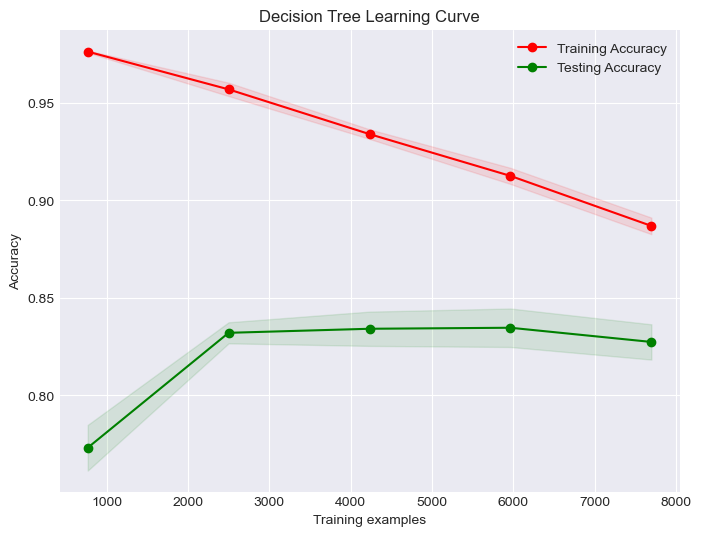

In [106]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")

    # Generate learning curve values
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')

    # Calculate mean and standard deviation of training and testing scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plotting the learning curve
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")

    plt.legend(loc="best")
    return plt

# Plotting the learning curve for Decision Tree Classifier
plot_learning_curve(dt_classifier, "Decision Tree Learning Curve", X_train, y_train, cv=5)
plt.show()


In [107]:
# Feaatue interaction
#To improve  improve a model's ability to understand and predict patterns in the data,for non linear replations interactions
features = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']

# Feature Engineering: Creating polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[features])

# Creating a DataFrame with the new polynomial features
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(features))

In [108]:
# Normalization (using Min-Max Scaling)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(poly_features_df)

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Fault_Type'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Display the shapes of the new training and testing sets and the first few rows of the new feature DataFrame
X_train.shape, X_test.shape, y_train.shape, y_test.shape, poly_features_df.head()

((9618, 27),
 (2405, 27),
 (9618,),
 (2405,),
           Ia        Ib        Ic        Va        Vb        Vc      Ia^2  \
 0   0.340109  0.444202  0.732590  0.891979  0.035133  0.572906  0.115674   
 1   0.341701  0.443955  0.731137  0.901521  0.041169  0.557328  0.116759   
 ..       ...       ...       ...       ...       ...       ...       ...   
 3   0.344817  0.443638  0.728126  0.919444  0.054551  0.526023  0.118899   
 4   0.346340  0.443565  0.726572  0.927786  0.061907  0.510324  0.119951   
 
        Ia Ib     Ia Ic     Ia Va  ...      Ic^2     Ic Va     Ic Vb     Ic Vc  \
 0   0.151077  0.249161  0.303370  ...  0.536688  0.653455  0.025738  0.419705   
 1   0.151700  0.249830  0.308051  ...  0.534562  0.659136  0.030100  0.407483   
 ..       ...       ...       ...  ...       ...       ...       ...       ...   
 3   0.152974  0.251070  0.317040  ...  0.530168  0.669471  0.039720  0.383011   
 4   0.153624  0.251641  0.321329  ...  0.527907  0.674104  0.044980  0.370787  

In [109]:
features_list = list(poly_features_df.columns)
# Printing the list of columns
print(features_list)

['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Ia^2', 'Ia Ib', 'Ia Ic', 'Ia Va', 'Ia Vb', 'Ia Vc', 'Ib^2', 'Ib Ic', 'Ib Va', 'Ib Vb', 'Ib Vc', 'Ic^2', 'Ic Va', 'Ic Vb', 'Ic Vc', 'Va^2', 'Va Vb', 'Va Vc', 'Vb^2', 'Vb Vc', 'Vc^2']


In [110]:
cv_metrics = {'Model': [], 'Accuracy': []}
test_metrics = {'Model': [], 'Accuracy': []}

# Train and evaluate each algorithm
models = [

    (DecisionTreeClassifier(random_state=42), "Decision Trees"),
    (XGBClassifier(random_state=42), "XGBoost"),
]

# Train and evaluate each model
for model, model_name in models:
    fitted_model = train_and_evaluate_model(model, model_name, X_train, y_train)
    evaluate_on_test_set(fitted_model, model_name, X_test, y_test)

# Convert the dictionary of cross-validation metrics to a DataFrame
import pandas as pd
cv_metrics_df = pd.DataFrame(cv_metrics)
test_metrics_df = pd.DataFrame(test_metrics)
print("\nCross-validation Metrics:")
print(cv_metrics_df)
print("\nTest Metrics:")
print(test_metrics_df)

Decision Trees: Cross-validation metrics calculated
Decision Trees: Test metrics calculated
XGBoost: Cross-validation metrics calculated
XGBoost: Test metrics calculated

Cross-validation Metrics:
            Model  Accuracy
0  Decision Trees  0.855063
1         XGBoost  0.860574

Test Metrics:
            Model  Accuracy
0  Decision Trees  0.844491
1         XGBoost  0.851559


In [111]:
# Create the SMOTE object
# to balanced skewed data to make the model able to avoid biasness towards majority classes and to make model able to to perform well on unseen data
smote = SMOTE(random_state=42)

#Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
 
cv_metrics = {'Model': [], 'Accuracy': []}
test_metrics = {'Model': [], 'Accuracy': []}

# Dictionary to store trained models
trained_models = {}

# Train and evaluate each algorithm
models = [

    (DecisionTreeClassifier(random_state=42), "Decision Trees"),
    (XGBClassifier(random_state=42), "XGBoost"),
]

# Train and evaluate each model
for model, model_name in models:
    fitted_model = train_and_evaluate_model(model, model_name, X_train_smote, y_train_smote)
    evaluate_on_test_set(fitted_model, model_name, X_test, y_test)
    
    # Save the trained model using joblib
    model_filename = f"{model_name.lower().replace(' ', '_')}_model.pkl"
    joblib.dump(fitted_model, model_filename)
    
    # Store the trained model in the dictionary
    trained_models[model_name] = fitted_model

# Convert the dictionary of cross-validation metrics to a DataFrame
import pandas as pd
cv_metrics_df = pd.DataFrame(cv_metrics)
test_metrics_df = pd.DataFrame(test_metrics)
print("\nCross-validation Metrics:")
print(cv_metrics_df)
print("\nTest Metrics:")
print(test_metrics_df)

Decision Trees: Cross-validation metrics calculated
Decision Trees: Test metrics calculated
XGBoost: Cross-validation metrics calculated
XGBoost: Test metrics calculated

Cross-validation Metrics:
            Model  Accuracy
0  Decision Trees  0.853907
1         XGBoost  0.860142

Test Metrics:
            Model  Accuracy
0  Decision Trees  0.844491
1         XGBoost  0.852391


# Hyperparameter tuning

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as IMBPipeline
from imblearn.over_sampling import SMOTE

# Create the pipeline with SMOTE and the classifier
pipeline = IMBPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define the parameter grid for Decision Trees
dt_param_grid = {
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform grid search
dt_grid_search = GridSearchCV(pipeline, dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
dt_grid_search.fit(X_train, y_train)

# Extract the best parameters and the best score for Decision Trees
dt_best_params = dt_grid_search.best_params_
dt_best_score = dt_grid_search.best_score_

# Output the best parameters and score for Decision Trees
print('Best parameters for Decision Trees:', dt_best_params)
print('Best score for Decision Trees:', dt_best_score)

# Use the best parameters obtained from GridSearchCV to create a refined model
improved_dt = DecisionTreeClassifier(random_state=42,
                                     max_depth=dt_best_params['classifier__max_depth'],
                                     min_samples_split=dt_best_params['classifier__min_samples_split'],
                                     min_samples_leaf=dt_best_params['classifier__min_samples_leaf'])

# Fit the model on the entire training set
improved_dt.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Trees: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
Best score for Decision Trees: 0.8818880863342642


DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)

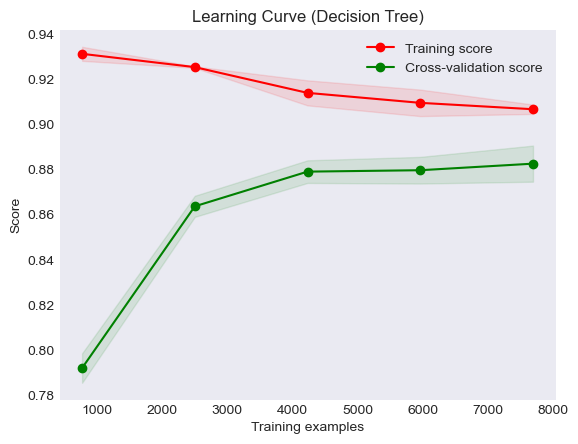

In [113]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plotting learning curve for the improved Decision Tree model
plot_learning_curve(improved_dt, "Learning Curve (Decision Tree)", X_train, y_train, cv=5, n_jobs=-1)
plt.show()


#### After doing hyperparameter tuning accuracy is now improved from 84 to 88 percent

## NEURAL NETWORK

In [114]:
y = data.iloc[:,0]
X = data.iloc[:,1:7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9618, 6), (2405, 6), (9618,), (2405,))

In [115]:
tf.random.set_seed(2)

model1 = keras.models.Sequential()

model1.add(keras.layers.Dense(6,  
                              input_shape=(6,),
                              name='Input_layer',
                              activation='relu'))
model1.add(keras.layers.Dense(16,
                             name='Hidden_layer1',
                             activation='relu'))
model1.add(keras.layers.Dense(1,
                             name='Output_layer',
                             activation='sigmoid'))

model1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

In [116]:
history = model1.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
241/241 [==============================] - 3s 7ms/step - loss: 0.6723 - accuracy: 0.5862 - val_loss: 0.6549 - val_accuracy: 0.5899
Epoch 2/20
241/241 [==============================] - 1s 5ms/step - loss: 0.6394 - accuracy: 0.5842 - val_loss: 0.6164 - val_accuracy: 0.5941
Epoch 3/20
241/241 [==============================] - 1s 4ms/step - loss: 0.5984 - accuracy: 0.6114 - val_loss: 0.5789 - val_accuracy: 0.6601
Epoch 4/20
241/241 [==============================] - 1s 5ms/step - loss: 0.5642 - accuracy: 0.6709 - val_loss: 0.5504 - val_accuracy: 0.6726
Epoch 5/20
241/241 [==============================] - 1s 3ms/step - loss: 0.5368 - accuracy: 0.6688 - val_loss: 0.5282 - val_accuracy: 0.6637
Epoch 6/20
241/241 [==============================] - 1s 3ms/step - loss: 0.5165 - accuracy: 0.6727 - val_loss: 0.5126 - val_accuracy: 0.6668
Epoch 7/20
241/241 [==============================] - 1s 3ms/step - loss: 0.5018 - accuracy: 0.6736 - val_loss: 0.5019 - val_accuracy: 0.6596
Epoch 

In [117]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 6)                 42        
                                                                 
 Hidden_layer1 (Dense)       (None, 16)                112       
                                                                 
 Output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


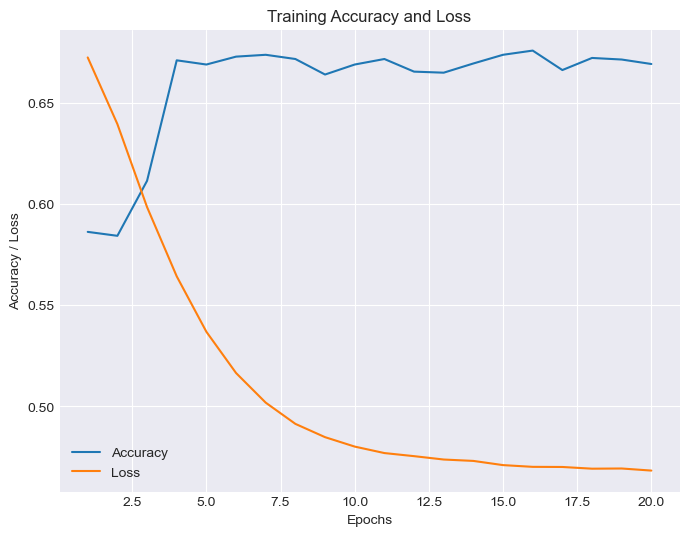

In [118]:
import matplotlib.pyplot as plt

# Extracting accuracy and loss values from history
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(accuracy) + 1)

# Create the plot
plt.figure(figsize=(8, 6))

# Plotting accuracy
plt.plot(epochs, accuracy, label='Accuracy')

# Plotting loss
plt.plot(epochs, loss, label='Loss')

# Labeling the plot
plt.title('Training Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


### as it can be observed from graph that after the stability accuracy is high and loss is low which means that there is a very low chance of error

In [119]:
y_pred = model1.predict(X_test)
y_pred.shape, y_test.shape

76/76 [==============================] - 0s 3ms/step


((2405, 1), (2405,))

In [120]:
y_pred = np.where(y_pred>0.5, 1, 0)

In [121]:
snn=accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {snn*100:.03f}%')
print(f'Precision Score: {precision_score(y_test, y_pred)*100:.03f}%')
print(f'Recall Score: {recall_score(y_test, y_pred)*100:.03f}%')

Accuracy Score: 65.655%
Precision Score: 70.965%
Recall Score: 67.129%


In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.64      0.62      1036
           1       0.71      0.67      0.69      1369

    accuracy                           0.66      2405
   macro avg       0.65      0.65      0.65      2405
weighted avg       0.66      0.66      0.66      2405



# MULTI LAYER NEURAL NETWORK

In [85]:
X = data.drop(['G','C','B','A','Fault_Type'], axis=1)
y = data['Fault_Type']
enc = LabelEncoder()
y = enc.fit_transform(y)
y = keras.utils.to_categorical(y, 12)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9618, 6), (2405, 6), (9618, 12), (2405, 12))

In [87]:
tf.random.set_seed(2)

model2 = keras.models.Sequential()

model2.add(keras.layers.Dense(128,
                              input_shape=(6,),
                              name='Input_layer',
                              activation='relu'))
model2.add(keras.layers.Dense(240,
                              name='Hidden_layer1',
                              activation='relu'))
model2.add(keras.layers.Dense(240,
                              name='Hidden_layer2',
                              activation='tanh'))
model2.add(keras.layers.Dense(240,
                              name='Hidden_layer3',
                              activation='relu'))

model2.add(keras.layers.Dense(12,
                             name='output_layer',
                             activation='softmax'))

model2.compile(
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

In [44]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 128)               896       
                                                                 
 Hidden_layer1 (Dense)       (None, 240)               30960     
                                                                 
 Hidden_layer2 (Dense)       (None, 240)               57840     
                                                                 
 Hidden_layer3 (Dense)       (None, 240)               57840     
                                                                 
 output_layer (Dense)        (None, 12)                2892      
                                                                 
Total params: 150428 (587.61 KB)
Trainable params: 150428 (587.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
history = model2.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50



121/121 [==============================] - 3s 11ms/step - loss: 1.6794 - accuracy: 0.3535 - val_loss: 1.2338 - val_accuracy: 0.4433
Epoch 2/50
121/121 [==============================] - 1s 6ms/step - loss: 0.9384 - accuracy: 0.5620 - val_loss: 1.2164 - val_accuracy: 0.4709
Epoch 3/50
121/121 [==============================] - 1s 7ms/step - loss: 0.7385 - accuracy: 0.6453 - val_loss: 0.9741 - val_accuracy: 0.5988
Epoch 4/50
121/121 [==============================] - 1s 7ms/step - loss: 0.6292 - accuracy: 0.7044 - val_loss: 0.6871 - val_accuracy: 0.6642
Epoch 5/50
121/121 [==============================] - 1s 7ms/step - loss: 0.5657 - accuracy: 0.7230 - val_loss: 0.5305 - val_accuracy: 0.7204
Epoch 6/50
121/121 [==============================] - 1s 8ms/step - loss: 0.5060 - accuracy: 0.7589 - val_loss: 0.8692 - val_accuracy: 0.5956
Epoch 7/50
121/121 [==============================] - 1s 8ms/step - loss: 0.4768 - accuracy: 0.7701 - val_loss: 0.4989 - val_accuracy: 0.7510
Epoch 8/50
121/1

In [93]:
y_pred_prob = model2.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test = np.argmax(y_test, axis=1)

76/76 [==============================] - 0s 4ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [94]:
y_test.shape, y_pred.shape
mnn=accuracy_score(y_test, y_pred)
print(f'Accuracy Score : {mnn*100:.03f}%')
print(classification_report(y_test, y_pred))

Accuracy Score : 89.480%
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       190
           1       0.00      0.00      0.00       194
           2       0.99      0.95      0.97       169
           3       0.96      1.00      0.98       203
           4       1.00      1.00      1.00       191
           5       0.97      0.98      0.98       232
           6       1.00      0.96      0.98       206
           7       1.00      1.00      1.00       208
           8       0.95      1.00      0.98       212
           9       0.88      0.99      0.93       198
          10       1.00      0.94      0.97       179
          11       0.98      0.88      0.92       223

    accuracy                           0.89      2405
   macro avg       0.85      0.89      0.86      2405
weighted avg       0.86      0.89      0.87      2405



C:\Users\Ayesha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ayesha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ayesha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


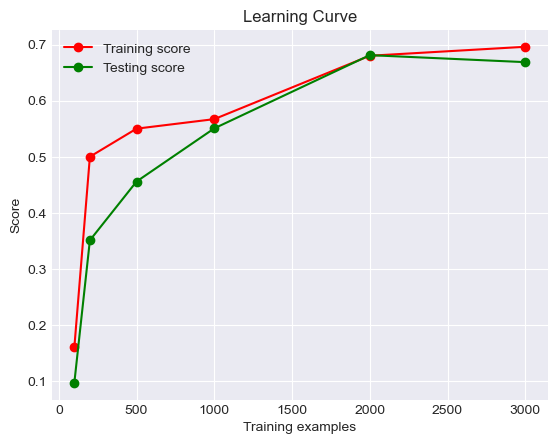

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

# Assuming you have X and y defined from your data
# X = ...
# y = ...
#y_encoded = label_encoder.fit_transform(data['Fault_Type'])
# Data preprocessing
enc = LabelEncoder()
y = enc.fit_transform(data['Fault_Type'])
y = keras.utils.to_categorical(y, num_classes=12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define the sizes of training sets to be used in the learning curve
train_sizes = [100, 200, 500, 1000, 2000, 3000]  # Define your desired sizes here

train_scores = []
test_scores = []

for size in train_sizes:
    # Create a new model instance for each size to avoid using the previously trained model
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(128, input_shape=(6,), name='Input_layer', activation='relu'))
    model.add(keras.layers.Dense(240, name='Hidden_layer1', activation='relu'))
    model.add(keras.layers.Dense(240, name='Hidden_layer2', activation='tanh'))
    model.add(keras.layers.Dense(240, name='Hidden_layer3', activation='relu'))
    model.add(keras.layers.Dense(12, name='output_layer', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model with the subset of data
    history = model.fit(X_train[:size], y_train[:size], epochs=10, batch_size=32, verbose=0)
    
    # Evaluate the model on training and test sets
    train_score = model.evaluate(X_train[:size], y_train[:size], verbose=0)[1]
    test_score = model.evaluate(X_test, y_test, verbose=0)[1]

    train_scores.append(train_score)
    test_scores.append(test_score)

# Plotting the learning curve
plt.figure()
plt.plot(train_sizes, train_scores, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores, 'o-', color="g", label="Testing score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming y_test contains true labels and y_pred contains predicted labels

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy score
acc_score = accuracy_score(y_test, y_pred)

# Print accuracy score
print(f'Accuracy Score : {acc_score * 100:.03f}%')

# Print classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
print('Confusion Matrix:')
print(conf_matrix)


Accuracy Score : 89.480%
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       190
           1       0.00      0.00      0.00       194
           2       0.99      0.95      0.97       169
           3       0.96      1.00      0.98       203
           4       1.00      1.00      1.00       191
           5       0.97      0.98      0.98       232
           6       1.00      0.96      0.98       206
           7       1.00      1.00      1.00       208
           8       0.95      1.00      0.98       212
           9       0.88      0.99      0.93       198
          10       1.00      0.94      0.97       179
          11       0.98      0.88      0.92       223

    accuracy                           0.89      2405
   macro avg       0.85      0.89      0.86      2405
weighted avg       0.86      0.89      0.87      2405

Confusion Matrix:
[[190   0   0   0   0   0   0   0   0   0   0   0]
 [194   0   0   0   0   0   0   0   0  

C:\Users\Ayesha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ayesha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ayesha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


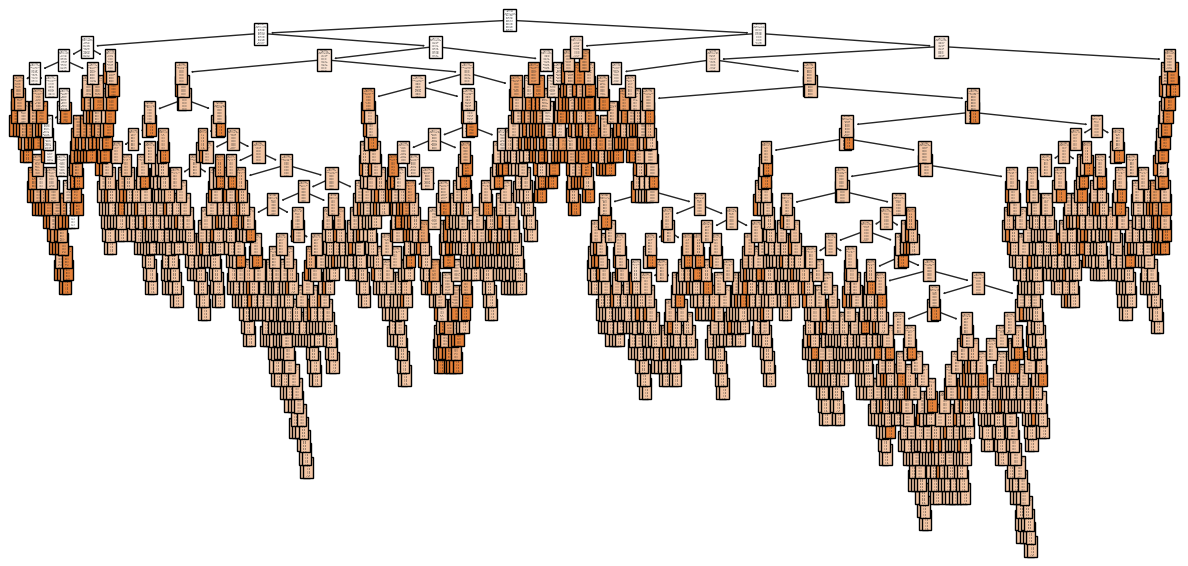

In [96]:
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import plot_tree function
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Assuming you have your training data X_train and y_train
decision = DecisionTreeClassifier()  # Initialize the Decision Tree Classifier
decision.fit(X_train, y_train)  # Fit the model with your training data

plt.figure(figsize=(15, 7))
plot_tree(decision, filled=True, feature_names=['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'])  # Visualize the decision tree
plt.show()


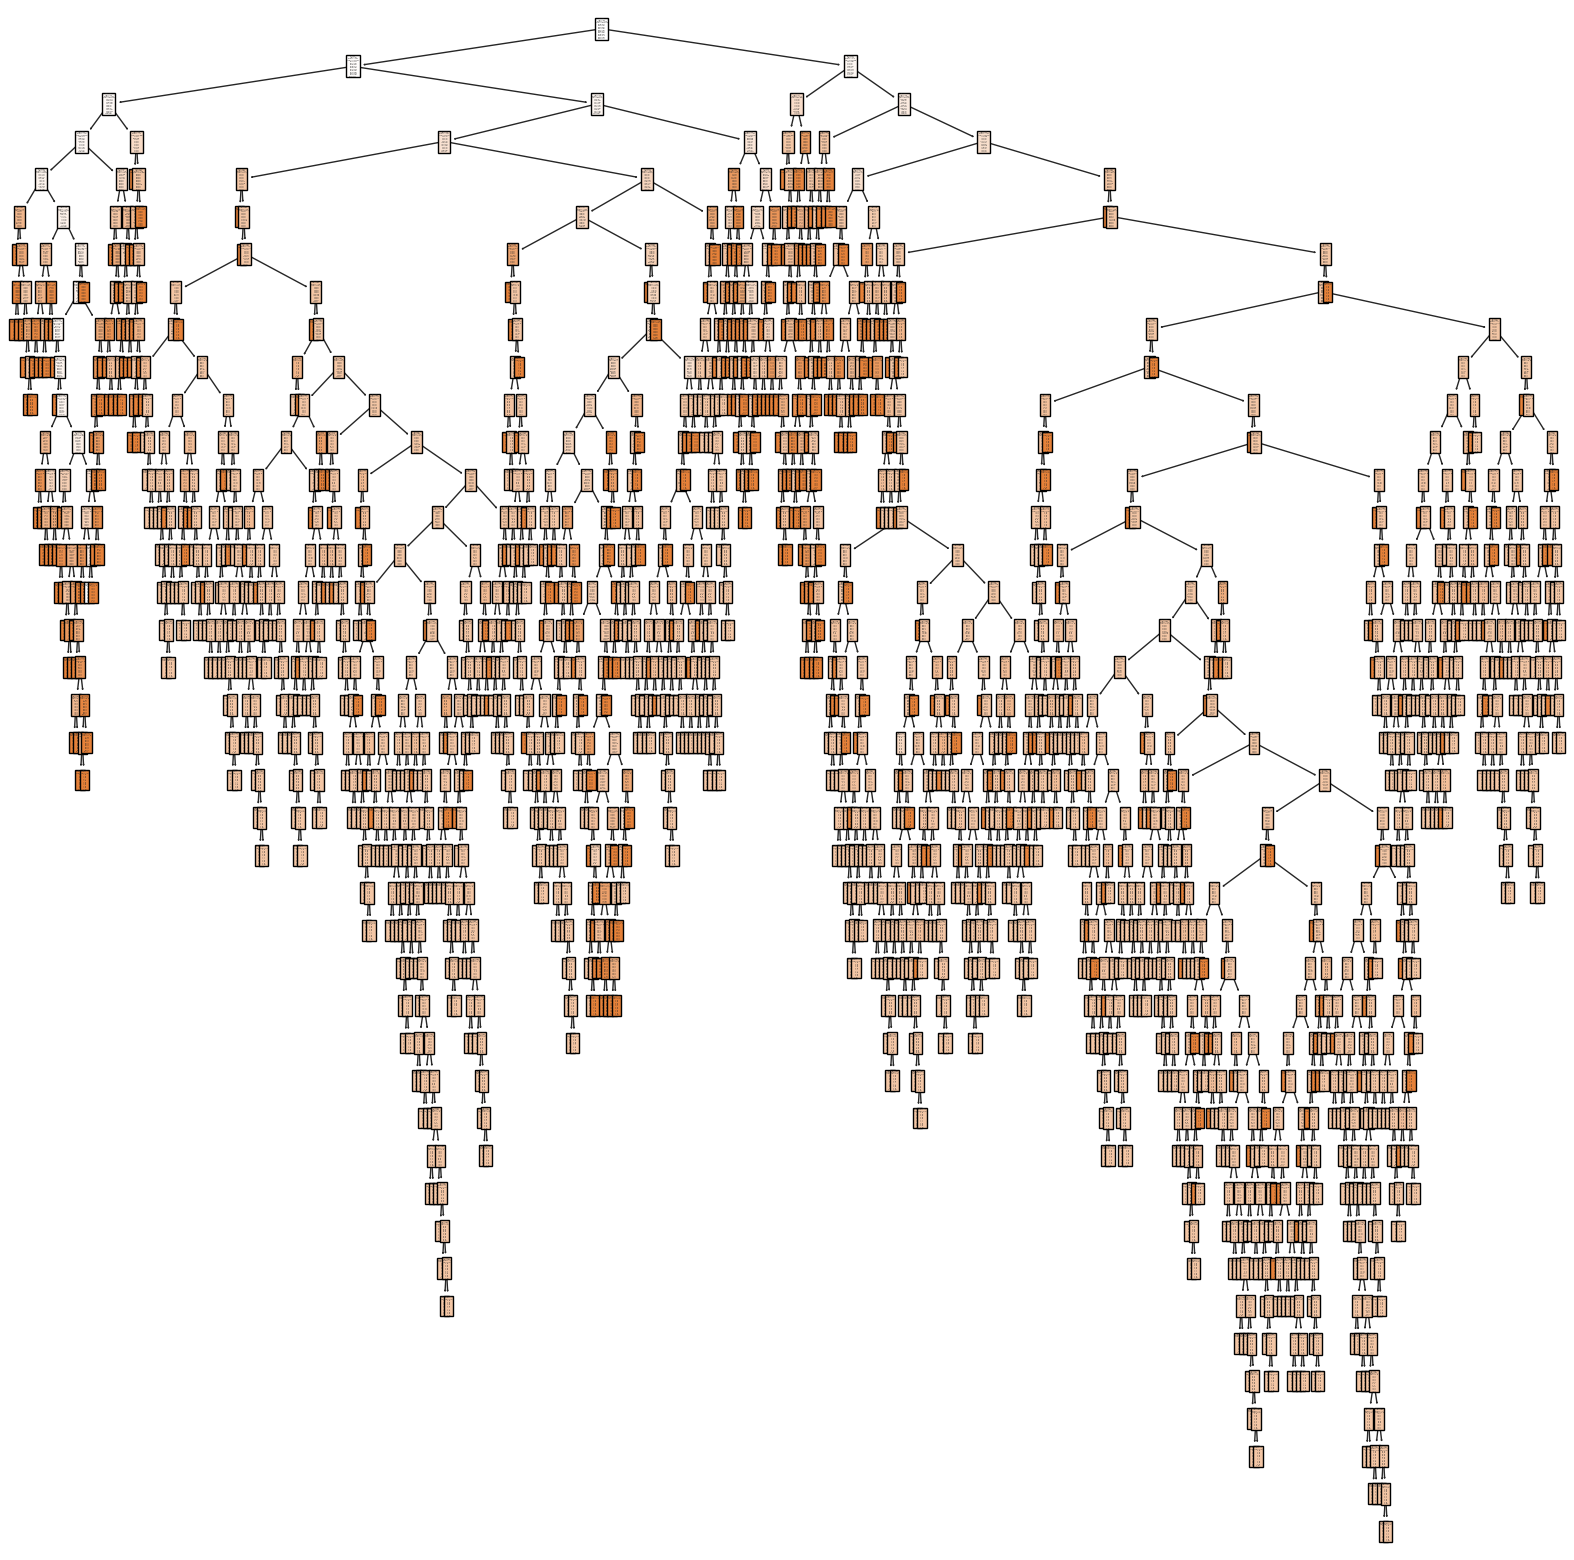

In [88]:
from sklearn import tree
def tree_plot(model_name):
    plt.figure(figsize=(20,20))
    features = data.columns
    classes = ['NO Fault','Line A to Ground Fault','Line B to Line C Fault','Line A Line B to Ground Fault','Line A Line B Line C','Line A Line B Line C to Ground Fault']
    tree.plot_tree(model_name,feature_names=features,class_names=classes,filled=True)
    plt.show()
    
tree_plot(decision)

# Comparison of Models

In [99]:
import pandas as pd

# Assuming you have the accuracy scores stored in dt_best_score, snn, mnn variables
models = pd.DataFrame({
    'Model': [
        'Decision Tree', 'Single Neural Network', 'Multi-layer Neural Network','Gradient Boosting'
    ],
    'Model Accuracy Score': [
        dt_best_score, snn, mnn,accuracy_best_g
    ]
})

# Set maximum rows displayed to the length of the DataFrame
pd.set_option('display.max_rows', len(models))

# Apply a color gradient to highlight the values
styled_models = (
    models.sort_values(by='Model Accuracy Score', ascending=False)
    .style.background_gradient(cmap='coolwarm')
    .hide_index()
    .set_properties(**{
        'font-family': 'Times New Roman',
        'color': 'Black',
        'font-size': '20px'
    })
)

styled_models


C:\Users\Ayesha\AppData\Local\Temp\ipykernel_9088\779549781.py:20: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  .hide_index()


Model,Model Accuracy Score
Multi-layer Neural Network,0.894802
Decision Tree,0.881888
Gradient Boosting,0.854470
Single Neural Network,0.660291
